# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [94]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [95]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [96]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [7]:
df_train.shape

(15223, 52)

In [97]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [9]:
df_test.shape

(14910, 52)

In [10]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [98]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [99]:
df = df_test.append(df_train).reset_index(drop=True)

In [100]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [101]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее', 'Неоконченное высшее', 'Среднее специальное', 'Ученая степень', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Банк/Финансы', 'Логистика', 'Развлечения/Искусство', 'Государственная служба', 'Нефтегазовая промышленность', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Энергетика', 'Сборочные производства', 'Сельское хозяйство', 'Образование', 'Недвижимость', 'Маркетинг', 'Торговля', 'Страхование', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Информационные услуги', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'Наука', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Юридические услуги/нотариальные услуги', 'Строительство', 'Салоны красоты и здоровья', 'Другие сферы', 'Металлургия/Промышленность/Машиностроение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [102]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
#Столбцы GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, REGION_NM имеют текстовые значения, можем удалить их из выбрки т.к. пользы для нас не содержат
#В столбце WORK_TIME пцстые значения можно заменить мединой
#Столбец PREVIOUS_CARD_NUM_UTILIZED можем преобразовать в несколько столбцов, для каждого типа значения свой столбец, для пустых значений указать 0.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#Столбцы EDUCATION, MARITAL_STATUS, FAMILY_INCOME можем преобразовать в несколько столбцов, для каждого типа значения свой столбец.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [103]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
AGREEMENT_RK,59909969,59910420,59911223,59911322,59911438,59911769,59912044,59912382,59912422,59912485
TARGET,0,0,0,0,0,0,0,0,0,1
AGE,30,48,35,22,27,44,57,33,53,33
SOCSTATUS_WORK_FL,1,0,1,1,1,0,1,1,0,1
SOCSTATUS_PENS_FL,0,1,0,0,0,1,0,0,1,0
GENDER,1,1,0,0,1,0,1,1,1,0
CHILD_TOTAL,1,0,1,0,2,2,0,2,2,1
DEPENDANTS,1,0,0,0,2,2,0,2,0,0
EDUCATION,Среднее специальное,Среднее,Среднее,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее специальное,Неполное среднее
MARITAL_STATUS,Не состоял в браке,Состою в браке,Не состоял в браке,Не состоял в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Состою в браке,Состою в браке


In [104]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE','REGION_NM'], axis=1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output.PREVIOUS_CARD_NUM_UTILIZED[df_output.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = 0 
    df_output.WORK_TIME[df_output.WORK_TIME.isnull()] = df_output.WORK_TIME.mean()
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME'])  
    return df_output

In [114]:
df_res = preproc_data(df)
df_res.head(15).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
TARGET,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
AGE,30,48,35,22,27,44,57,33,53,33,33,40,59,39,23
SOCSTATUS_WORK_FL,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1
SOCSTATUS_PENS_FL,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
GENDER,1,1,0,0,1,0,1,1,1,0,0,1,1,1,0
CHILD_TOTAL,1,0,1,0,2,2,0,2,2,1,1,1,0,2,0
DEPENDANTS,1,0,0,0,2,2,0,2,0,0,1,1,0,2,0
PERSONAL_INCOME,7000,4100,40000,20000,17000,7000,10000,7500,9000,4000,15000,12000,8000,20000,18500
REG_FACT_FL,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FACT_POST_FL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [115]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [116]:
#df_train_preproc.head().T
df_preproc.head().T

,0,1,2,3,4
TARGET,0,0,0,0,0
AGE,30,48,35,22,27
SOCSTATUS_WORK_FL,1,0,1,1,1
SOCSTATUS_PENS_FL,0,1,0,0,0
GENDER,1,1,0,0,1
CHILD_TOTAL,1,0,1,0,2
DEPENDANTS,1,0,0,0,2
PERSONAL_INCOME,7000,4100,40000,20000,17000
REG_FACT_FL,0,1,1,1,1
FACT_POST_FL,1,1,1,1,1


In [107]:
df_test_preproc.shape
#df_train_preproc.shape

(14910, 55)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [117]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc['TARGET']
X_test = df_train_preproc.drop(['TARGET'], axis=1)

In [118]:
#X.head().T
df_preproc.head().T

,0,1,2,3,4
TARGET,0,0,0,0,0
AGE,30,48,35,22,27
SOCSTATUS_WORK_FL,1,0,1,1,1
SOCSTATUS_PENS_FL,0,1,0,0,0
GENDER,1,1,0,0,1
CHILD_TOTAL,1,0,1,0,2
DEPENDANTS,1,0,0,0,2
PERSONAL_INCOME,7000,4100,40000,20000,17000
REG_FACT_FL,0,1,1,1,1
FACT_POST_FL,1,1,1,1,1


#### Задание 5. Обучение и оценка качества разных моделей

In [119]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
df_preproc = df_preproc.drop(['sample'], axis=1)
y = df_preproc['TARGET']
df_model = df_preproc.drop(['TARGET'], axis=1)
#разбиваем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.3, random_state=42)

In [120]:
X_train.head().T

,16948,18996,29105,5318,11762
AGE,28.0,50.0,55.0,42.0,46.0
SOCSTATUS_WORK_FL,1.0,1.0,1.0,1.0,1.0
SOCSTATUS_PENS_FL,0.0,0.0,0.0,0.0,0.0
GENDER,1.0,1.0,1.0,1.0,1.0
CHILD_TOTAL,1.0,1.0,1.0,2.0,0.0
DEPENDANTS,1.0,1.0,0.0,1.0,0.0
PERSONAL_INCOME,15000.0,9000.0,15000.0,10500.0,25000.0
REG_FACT_FL,1.0,1.0,1.0,1.0,1.0
FACT_POST_FL,1.0,1.0,1.0,1.0,1.0
REG_POST_FL,1.0,1.0,1.0,1.0,1.0


In [121]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictdtc = dtc.predict(X_test)
predictdtcpr = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictrfc = rfc.predict(X_test)
predictrfcpr = rfc.predict_proba(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictlr = lr.predict(X_test)
predictlrpr = lr.predict_proba(X_test)

In [122]:
predictdtc, predictrfc, predictlr, predictdtcpr, predictrfcpr, predictlrpr

(array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]]),
 array([[0.6, 0.4],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.7, 0.3],
        [0.9, 0.1],
        [0.8, 0.2]]),
 array([[0.81047835, 0.18952165],
        [0.85425428, 0.14574572],
        [0.85238114, 0.14761886],
        ...,
        [0.93305972, 0.06694028],
        [0.8516888 , 0.1483112 ],
        [0.70805839, 0.29194161]]))

In [124]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score(y_test, predictdtc), accuracy_score(y_test, predictrfc), accuracy_score(y_test, predictlr)
    
print('accuracy', accuracy_score(y_test, predictdtc), accuracy_score(y_test, predictrfc), accuracy_score(y_test, predictlr))
print('precision', precision_score(y_test, predictdtc), precision_score(y_test, predictrfc), precision_score(y_test, predictlr))
print('recall', recall_score(y_test, predictdtc), recall_score(y_test, predictrfc), recall_score(y_test, predictlr))


accuracy 0.7929203539823009 0.8768805309734513 0.8787610619469026
precision 0.16906170752324598 0.2857142857142857 0.18181818181818182
recall 0.18365472910927455 0.014692378328741965 0.0018365472910927456


(-0.01, 1.01)

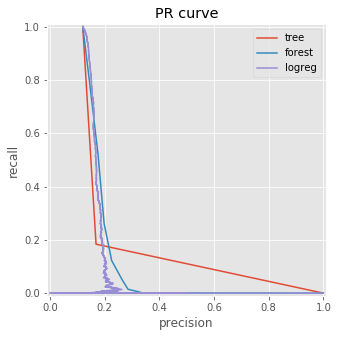

In [125]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
precision_t, recall_t, thresholds_t = precision_recall_curve(y_test, predictdtcpr[:,1])
precision_f, recall_f, thresholds_f = precision_recall_curve(y_test, predictrfcpr[:,1])
precision_l, recall_l, threshold_ls = precision_recall_curve(y_test, predictlrpr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision_t, recall_t, label='tree')
plt.plot(precision_f, recall_f, label='forest')
plt.plot(precision_l, recall_l, label='logreg')
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.legend()
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

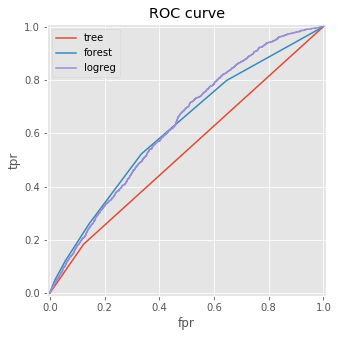

In [127]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, predictdtcpr[:,1])
fpr_f, tpr_f, thresholds_f = roc_curve(y_test, predictrfcpr[:,1])
fpr_l, tpr_l, threshold_ls = roc_curve(y_test, predictlrpr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_t, tpr_t, label='tree')
plt.plot(fpr_f, tpr_f, label='forest')
plt.plot(fpr_l, tpr_l, label='logreg')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend()
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [128]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df_model,
    y,
    scoring='roc_auc',
    cv = cv1.split(df_model, y)
)

array([0.58361366, 0.62792433, 0.60078106, 0.61117865, 0.63135961,
       0.60908645, 0.62664607, 0.59169969, 0.62070564, 0.6061432 ])

In [129]:
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df_model,
    y,
    scoring='roc_auc',
    cv = cv1.split(df_model, y)
)

array([0.52768399, 0.54032897, 0.53304288, 0.5393861 , 0.53421797,
       0.53061026, 0.5314962 , 0.53414449, 0.51688671, 0.53321732])

In [130]:
lr = LogisticRegression()
cross_val_score(
    lr,
    df_model,
    y,
    scoring='roc_auc',
    cv = cv1.split(df_model, y)
)

array([0.63763745, 0.61248918, 0.61216608, 0.62002216, 0.63186495,
       0.63435889, 0.64447738, 0.60315131, 0.62519717, 0.63946307])

In [132]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
# Выбираем LogisticRegression, т.к. у нее лучшая рок кривая и лучший показатель roc_auc на cross_val_score 
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictlrpr = lr.predict_proba(X_test)
predictlrpr[:,1]

array([0.18952165, 0.14574572, 0.14761886, ..., 0.06694028, 0.1483112 ,
       0.29194161])

In [133]:
# Померить roc_auc на тесте
# показатель не высокого качества, для улучшения можно еще поработать над предпроцессингом данных
roc_auc_score(y_test, predictlrpr[:,1])

0.6304217094626534